In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('Imputed.csv')
df.columns = df.columns.str.strip()


We import the necessary libraries and store the dataset in our dataframe. I've imputed the dataset to deal with missing values using the mean.

In [147]:
df.count()

Country                            2938
Year                               2938
Status                             2938
Life expectancy                    2938
Adult Mortality                    2938
infant deaths                      2938
Alcohol                            2938
percentage expenditure             2938
Hepatitis B                        2938
Measles                            2938
BMI                                2938
under-five deaths                  2938
Polio                              2938
Total expenditure                  2938
Diphtheria                         2938
HIV/AIDS                           2938
GDP                                2938
Population                         2938
thinness 1-19 years                2938
thinness 5-9 years                 2938
Income composition of resources    2938
Schooling                          2938
dtype: int64

In [136]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [148]:
for col in df.columns:
    print(f"'{col}'")

'Country'
'Year'
'Status'
'Life expectancy'
'Adult Mortality'
'infant deaths'
'Alcohol'
'percentage expenditure'
'Hepatitis B'
'Measles'
'BMI'
'under-five deaths'
'Polio'
'Total expenditure'
'Diphtheria'
'HIV/AIDS'
'GDP'
'Population'
'thinness 1-19 years'
'thinness 5-9 years'
'Income composition of resources'
'Schooling'


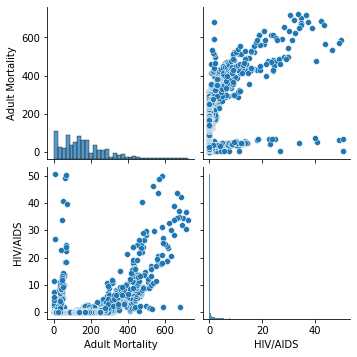

In [149]:
subset = df[['Adult Mortality', 'HIV/AIDS']]
sns.pairplot(subset)
plt.show()

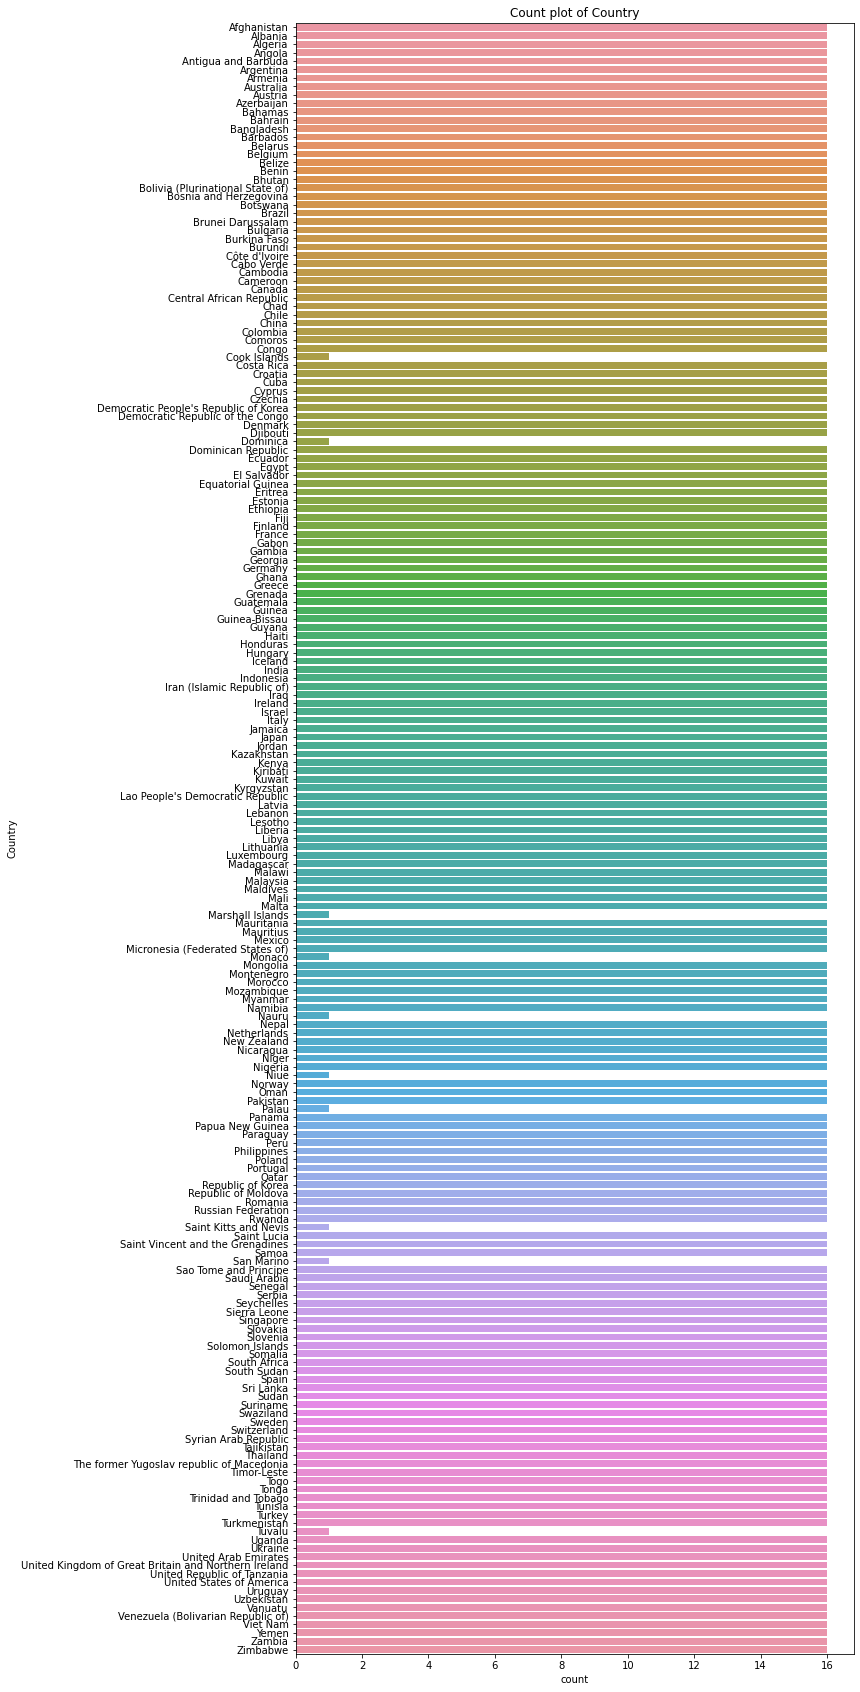

In [139]:
plt.figure(figsize=(10, 30))
sns.countplot(y=df['Country'])
plt.title('Count plot of Country')
plt.show()


This is to check the count of the countries. As evident certain countries like Cook Islands have data for only 1 year

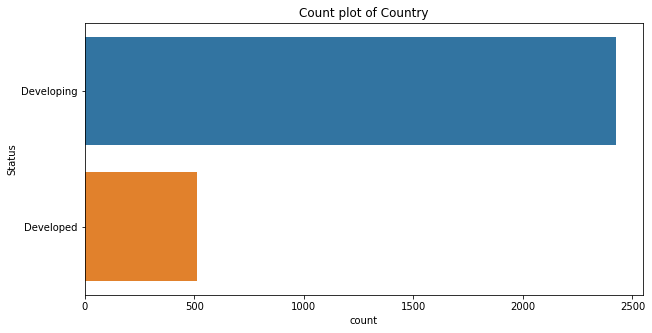

In [140]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Status'])
plt.title('Count plot of Country')
plt.show()

 Developing countires vs Developed count

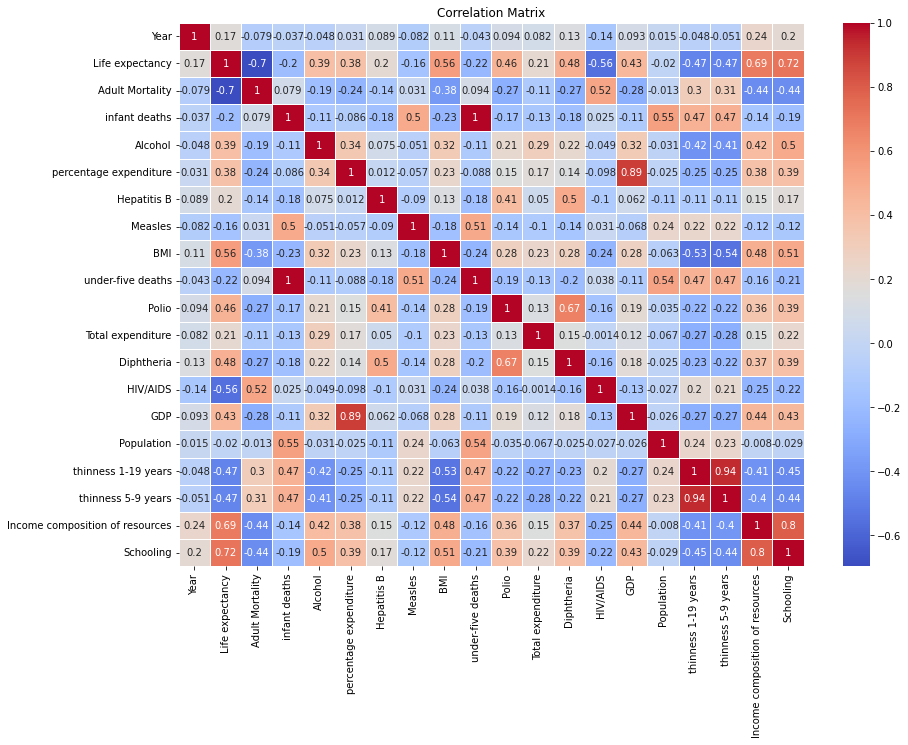

In [167]:
correlation_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Correlation Matrix

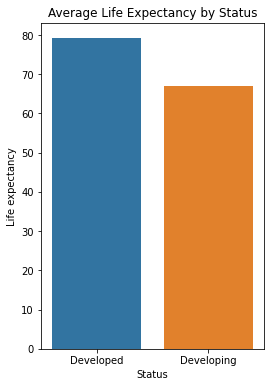

In [141]:
status_group = df.groupby('Status')['Life expectancy'].mean().reset_index()

plt.figure(figsize=(4, 6))
sns.barplot(x='Status', y='Life expectancy', data=status_group)
plt.title('Average Life Expectancy by Status')
plt.show()

As expected, developed countries have a higher life expectancy than the developing ones

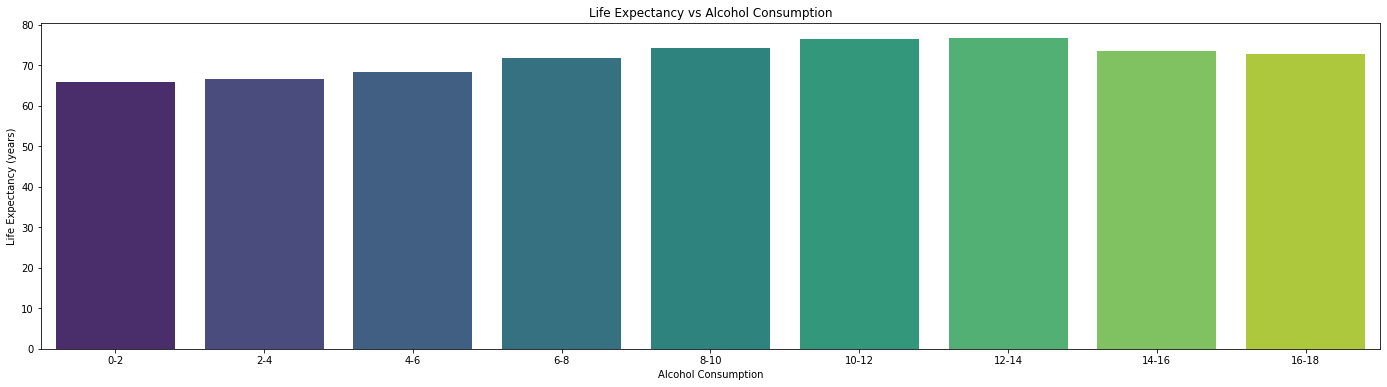

In [162]:
bin_alcohol = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
bin_alcohol_labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18']
df['Alcohol_bins'] = pd.cut(df['Alcohol'], bins=bin_alcohol, labels=bin_alcohol_labels)

alcohol_group = df.groupby('Alcohol_bins')['Life expectancy'].mean().reset_index()
plt.figure(figsize=(24, 6))
sns.barplot(x='Alcohol_bins', y='Life expectancy', data=alcohol_group, palette='viridis')
plt.title('Life Expectancy vs Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy (years)')
plt.show()



Interestingly, Alcohol Consumption doesn't seem to reduce life expectancy. This is evident in the correlation heatmap as well, with the correlation between alcohol and life expectancy being positive

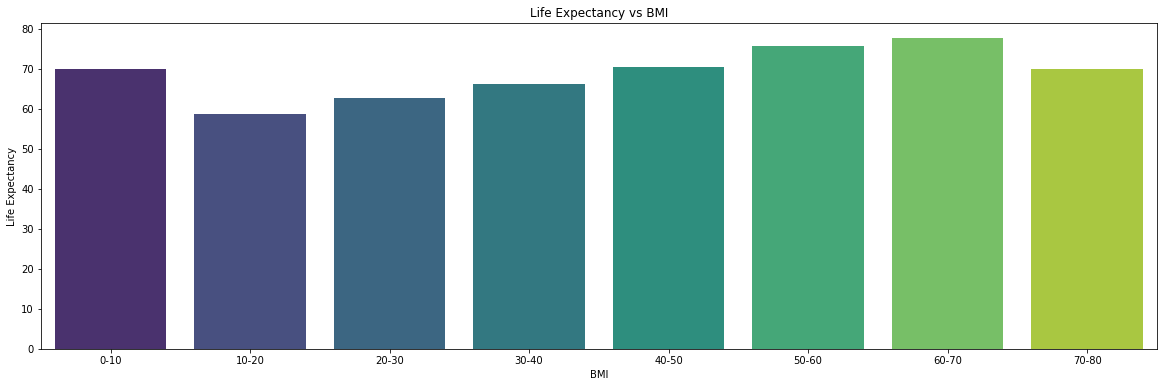

In [143]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80]
bin_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['BMI_bins'] = pd.cut(df['BMI'], bins=bin_edges, labels = bin_labels)

BMI_group = df.groupby('BMI_bins')['Life expectancy'].mean().reset_index()


plt.figure(figsize=(20, 6))
sns.barplot(x = 'BMI_bins', y = 'Life expectancy', data = BMI_group, palette='viridis')
plt.title('Life Expectancy vs BMI')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.show()

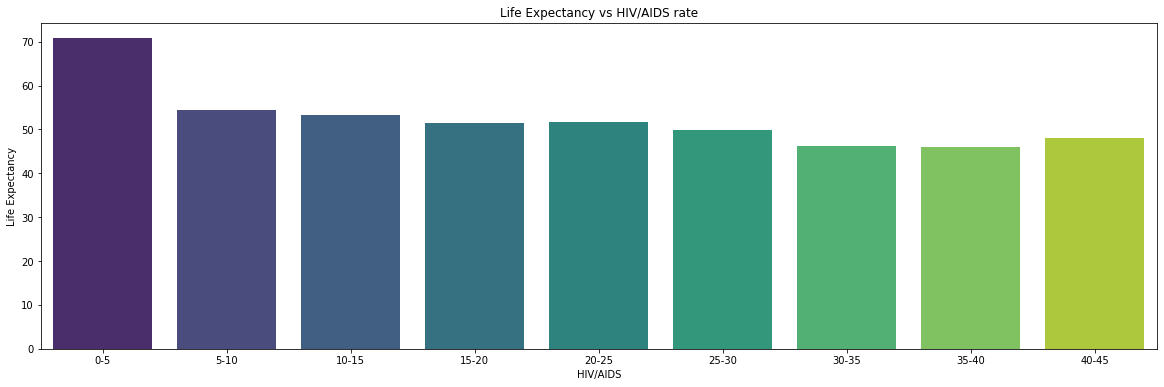

In [164]:
hiv_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
hiv_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45']
df['HIV_bins'] = pd.cut(df['HIV/AIDS'], bins=hiv_bins, labels = hiv_labels)

HIV_group = df.groupby('HIV_bins')['Life expectancy'].mean().reset_index()


plt.figure(figsize=(20, 6))
sns.barplot(x = 'HIV_bins', y = 'Life expectancy', data = HIV_group, palette='viridis')
plt.title('Life Expectancy vs HIV/AIDS rate')
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')
plt.show()

As evident, HIV/AIDS reduces life expectancy considerably. The correlation between the two is -0.56

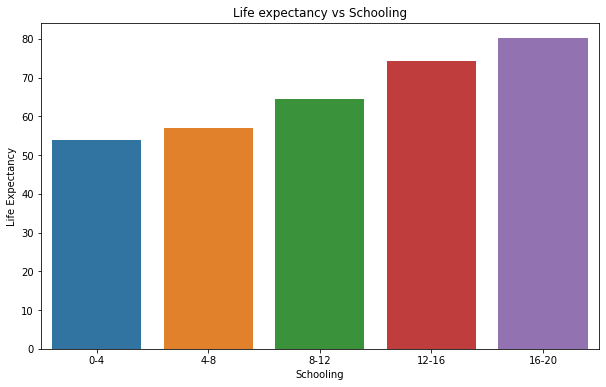

In [166]:
schooling_bins = [0, 4, 8, 12, 16, 20]
schooling_labels = ['0-4', '4-8', '8-12', '12-16', '16-20']
df['Schooling_bins'] = pd.cut(df['Schooling'], bins=schooling_bins, labels=schooling_labels)

schooling_group = df.groupby('Schooling_bins')['Life expectancy'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x = 'Schooling_bins', y = 'Life expectancy', data = schooling_group)
plt.title('Life expectancy vs Schooling')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.show()

Education/Schooling has a positive effect on life expectancy as seen in the bar plot

In [226]:
X = df[['BMI','under-five deaths','Diphtheria', 'Schooling', 'GDP', 'Hepatitis B', 'infant deaths', 'Polio', 'Population', 'thinness 1-19 years']] 
y = df[['Life expectancy']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
residuals = y_test - y_pred

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Residuals:{residuals}")

coefficients = model.coef_.flatten()  
intercept = model.intercept_

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Display the coefficients and intercept
print(coef_df)
print(f"Intercept: {intercept}")


Mean Squared Error: 25.64813292911731
R-squared: 0.7039527794604095
Residuals:      Life expectancy
2546         8.882711
650          0.337732
1740        -0.897909
177          0.031544
1377        -4.643783
...               ...
859          1.444846
1405        -4.282833
962         -3.801995
2658         0.254218
2272         0.431632

[588 rows x 1 columns]
               Feature   Coefficient
0                  BMI  8.276403e-02
1    under-five deaths -1.107886e-01
2           Diphtheria  5.007938e-02
3            Schooling  1.209649e+00
4                  GDP  9.245125e-05
5          Hepatitis B -1.261287e-02
6        infant deaths  1.528516e-01
7                Polio  3.869494e-02
8           Population  4.612799e-11
9  thinness 1-19 years -2.648879e-01
Intercept: [45.86434923]


I removed certain columns like percentage expenditure, total expenditure, income since they are already accounted for in GDP. There is also a strong correlation between 'thinness 1-19 years' and 'thinness 5-9 years', 'infant deaths' and 'under-five deaths' so I removed thinness 5-9 years and under-five deaths to avoid multicollinearity.

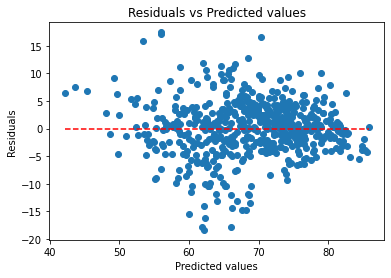

In [227]:
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()

Residual plot

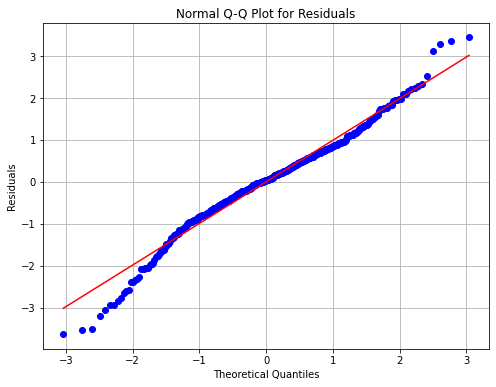

In [230]:
from scipy.stats import probplot

residuals_standardized = (residuals - residuals.mean()) / residuals.std()

plt.figure(figsize=(8, 6))
probplot(residuals_standardized.values.flatten(), dist="norm", plot=plt)
plt.title('Normal Q-Q Plot for Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


We calculate the standardized residuals to remove outliers and plot the QQ-plot 